# Background

Platform berbagi video terbesar di dunia, YouTube memiliki daftar video yang sedang tren (_trending_) di platform tersebut. Daftar video Trending bertujuan untuk membantu penonton melihat apa yang sedang populer di YouTube dan di seluruh dunia, dan menampilkan video yang akan dianggap menarik oleh banyak penonton. Beberapa tren dapat diprediksi, misalnya lagu baru dari artis populer atau cuplikan film baru. Namun, beberapa di antaranya tidak bisa diduga, misalnya saja video yang tiba-tiba viral.

Penentuan daftar video tren di YouTube menggunakan beberapa kombinasi faktor berupa jumlah penayangan (_views_), suka (_likes_), tidak suka (_dislikes_), dan komentar (_comments_). Namun tidak semua video yang tren di YouTube akan masuk ke daftar video yang paling banyak ditonton pada tahun diunggahnya video tersebut.

## Problem Statement

Setelah membedah dan menganalisis dataset video Trending YouTube Amerika Serikat, ada beberapa data video dengan kolom deskripsi yang kosong. Kolom deskripsi yang kosong akan mempengaruhi popularitas video di YouTube, karena pencantuman deskripsi dalam video di YouTube merupakan salah satu algoritma dalam Search Engine Optimisation (SEO) YouTube supaya video bisa lebih mudah dicari dalam _search engine_ seperti Google dan YouTube jika seandainya pengguna input search video yang tidak sesuai dengan judul video yang dicari. Hal ini tentunya juga berdampak pada jumlah penayangan, pembagian, suka, tidak suka, dan komentar video tersebut. Jadinya kita harus menganalisis dampak jumlah metrik tersebut dalam video trending YouTube yang tidak mencantumkan deskripsi.

Pernyataan permasalahannya adalah:

### Bagaimana Pengaruh Video Trending YouTube Tanpa Deskripsi Terhadap Jumlah Penayangan, Suka, dan Komentar?

Untuk membuktikan dan menjawab pertanyaan di atas, kita akan menganalisis data video Trending YouTube Amerika Serikat (US) yang sudah dikumpulkan menggunakan YouTube API.

Dataset dapat diakses [di sini](https://www.kaggle.com/datasets/datasnaek/youtube-new), gunakan dataset US.

Setelah menganalisis dataset tersebut, kita akan memfilter dataset hanya untuk data video Trending YouTube yang mempunyai data Description yang kosong (Missing Values), lalu menentukan hubungan permasalah tersebut terhadap variabel metrik Views, Likes, Dislikes, dan Comments menggunakan teknik analisis data, statistika, dan visualisasi menggunakan Jupyter dan Tableau.

## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind, f_oneway

import warnings
warnings.filterwarnings("ignore")

from datetime import datetime

## Read in Data

Berikut merupakan 5 data teratas dan 5 data terbawah dalam dataset Trending YouTube Video Statistics (US). Jumlah baris dan kolom di dataset df adalah (40949, 16)

In [2]:
df = pd.read_csv('USvideos.csv', low_memory=False) #increase efficiency
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [4]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [5]:
df.describe(include='object')

,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description
count,40949,40949,40949,40949,40949,40949,40949,40379
unique,6351,205,6455,2207,6269,6055,6352,6901
top,j4KvrAUjn6c,17.14.11,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,2018-05-18T14:00:04.000Z,[none],https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,► Listen LIVE: http://power1051fm.com/\n► Face...
freq,30,200,30,203,50,1535,30,58


In [6]:
# Menentukan number of unique dari setiap kolom

pd.set_option('display.max_colwidth', 120)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])
tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,video_id,6351,"[2kyS6SvSYSE, 1ZAPwfrtAFY, 5qpjK5DgCt4, puqaWrEC7tY, d380meD0W0M, gHZ1Qz0KiKM, 39idVpFF7NQ, nc99ccSXST0, jr9QtXwC9vc..."
1,trending_date,205,"[17.14.11, 17.15.11, 17.16.11, 17.17.11, 17.18.11, 17.19.11, 17.20.11, 17.21.11, 17.22.11, 17.23.11, 17.24.11, 17.25..."
2,title,6455,"[WE WANT TO TALK ABOUT OUR MARRIAGE, The Trump Presidency: Last Week Tonight with John Oliver (HBO), Racist Superman..."
3,channel_title,2207,"[CaseyNeistat, LastWeekTonight, Rudy Mancuso, Good Mythical Morning, nigahiga, iJustine, Saturday Night Live, CrazyR..."
4,category_id,16,"[22, 24, 23, 28, 1, 25, 17, 10, 15, 27, 26, 2, 19, 20, 29, 43]"
5,publish_time,6269,"[2017-11-13T17:13:01.000Z, 2017-11-13T07:30:00.000Z, 2017-11-12T19:05:24.000Z, 2017-11-13T11:00:04.000Z, 2017-11-12T..."
6,tags,6055,"[SHANtell martin, last week tonight trump presidency|""last week tonight donald trump""|""john oliver trump""|""donald tr..."
7,views,40478,"[748374, 2418783, 3191434, 343168, 2095731, 119180, 2103417, 817732, 826059, 256426, 81377, 104578, 687582, 544770, ..."
8,likes,29850,"[57527, 97185, 146033, 10172, 132235, 9763, 15993, 23663, 3543, 12654, 655, 1576, 114188, 7848, 7473, 9419, 8011, 53..."
9,dislikes,8516,"[2966, 6146, 5339, 666, 1989, 511, 2445, 778, 119, 1363, 25, 303, 1333, 1171, 246, 52, 638, 53, 36, 191, 75, 138, 89..."


### Missing Values

In [7]:
# jumlah missing value di tiap kolom
df.isna().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

In [8]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

video_id                  0.000000
trending_date             0.000000
title                     0.000000
channel_title             0.000000
category_id               0.000000
publish_time              0.000000
tags                      0.000000
views                     0.000000
likes                     0.000000
dislikes                  0.000000
comment_count             0.000000
thumbnail_link            0.000000
comments_disabled         0.000000
ratings_disabled          0.000000
video_error_or_removed    0.000000
description               1.391975
dtype: float64

<AxesSubplot:>

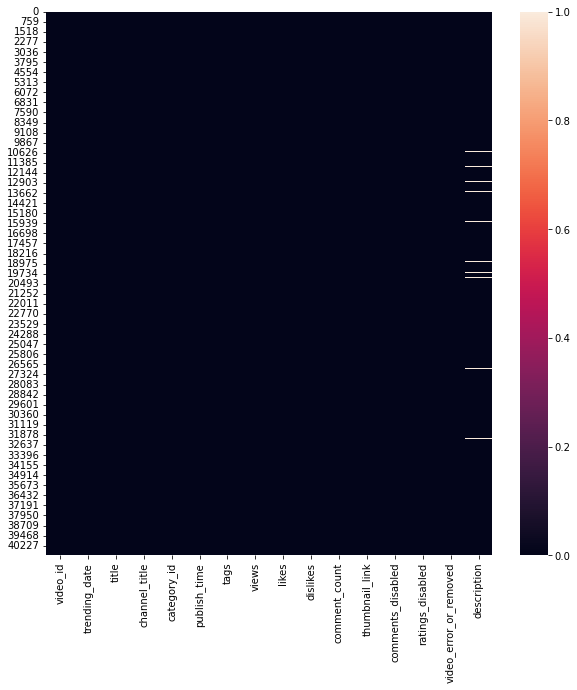

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df[['video_id', 'trending_date', 'title', 'channel_title', 'category_id', 'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'description']].isna())

Hanya kolom Description yang memiliki value kosong (Missing Values) dari dataset USA Trending Video YouTube Statistics, terdapat 570 kolom dengan value Description kosong dengan persentase hanya sekitar 1.39%. Meski demikian, mengunggah sebuah video di YouTube tidak perlu mencantumkan deskripsi, namun pencantuman deskripsi memang dibutuhkan sebagai salah satu algoritma dalam SEO (Search Engine Optimisation) YouTube, agar video YouTube lebih mudah dicari menggunakan alat pencarian (Search Engine) seperti Google dan YouTube dan bisa membuat suatu video bisa ditonton lebih banyak orang dan masuk ke dalam Daftar Trending.

Oleh karena itu, kita perlu menganalisis data video dengan kolom Description yang kosong dan dampaknya pada kolom lain yang mempengaruhi popularitas video di YouTube, seperti jumlah penonton, suka, tidak suka, dan komentar. 

Pertama, kita harus membuat DataFrame baru khusus untuk dataset yang akan kita analisis (hanya data yang memiliki kolom Description kosong), yang selanjutnya akan diberi nama variabel "df_capstone" untuk membedakan dari DataFrame dataset asli.

In [10]:
df[df['description'].isna()]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
42,NZFhMSgbKKM,17.14.11,Dennis Smith Jr. and LeBron James go back and forth,Ben Rohrbach,17,2017-11-13T15:11:00.000Z,[none],945,7,5,8,https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg,False,False,False,NaN
47,sbcbvuitiTc,17.14.11,Stephon Marbury and Jimmer Fredette fight in China,NBA Highlights · YouTube,17,2017-11-10T18:23:05.000Z,"NBA|""Basketball""|""Sports""",956169,2017,2425,1447,https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg,False,False,False,NaN
175,4d07RXYLsJE,17.14.11,Sphaera - demonstrating interaction,Jenny Hanell,28,2017-11-04T20:48:16.000Z,[none],1827,3,0,2,https://i.ytimg.com/vi/4d07RXYLsJE/default.jpg,False,False,False,NaN
267,NZFhMSgbKKM,17.15.11,Dennis Smith Jr. and LeBron James go back and forth,Ben Rohrbach,17,2017-11-13T15:11:00.000Z,[none],21544,83,74,62,https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg,False,False,False,NaN
312,sbcbvuitiTc,17.15.11,Stephon Marbury and Jimmer Fredette fight in China,NBA Highlights · YouTube,17,2017-11-10T18:23:05.000Z,"NBA|""Basketball""|""Sports""",1015189,2133,2483,1465,https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg,False,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40125,1h7KV2sjUWY,18.10.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1021063,58806,376,3903,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40325,1h7KV2sjUWY,18.11.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1024052,58862,377,3904,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40538,1h7KV2sjUWY,18.12.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1029290,58980,377,3931,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40739,1h7KV2sjUWY,18.13.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1034480,59090,379,3927,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN


In [11]:
df_capstone = pd.read_csv('videos.csv', low_memory=False) #increase efficiency
df_capstone.rename(columns={"Unnamed: 0": "id"}, inplace=True)
df_capstone.set_index('id', inplace=True)

In [12]:
df_capstone

,video_id,trending_date,trending_month,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
id,,,,,,,,,,,,,,,,,,,
42,NZFhMSgbKKM,2017-11-14,November 2017,Dennis Smith Jr. and LeBron James go back and forth,Ben Rohrbach,17,Sports,2017-11-13,15:11:00,[none],945,7,5,8,https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg,False,False,False,NaN
47,sbcbvuitiTc,2017-11-14,November 2017,Stephon Marbury and Jimmer Fredette fight in China,NBA Highlights · YouTube,17,Sports,2017-11-10,18:23:05,"NBA|""Basketball""|""Sports""",956169,2017,2425,1447,https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg,False,False,False,NaN
175,4d07RXYLsJE,2017-11-14,November 2017,Sphaera - demonstrating interaction,Jenny Hanell,28,Science & Technology,2017-11-04,20:48:16,[none],1827,3,0,2,https://i.ytimg.com/vi/4d07RXYLsJE/default.jpg,False,False,False,NaN
267,NZFhMSgbKKM,2017-11-15,November 2017,Dennis Smith Jr. and LeBron James go back and forth,Ben Rohrbach,17,Sports,2017-11-13,15:11:00,[none],21544,83,74,62,https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg,False,False,False,NaN
312,sbcbvuitiTc,2017-11-15,November 2017,Stephon Marbury and Jimmer Fredette fight in China,NBA Highlights · YouTube,17,Sports,2017-11-10,18:23:05,"NBA|""Basketball""|""Sports""",1015189,2133,2483,1465,https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg,False,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40125,1h7KV2sjUWY,2018-06-10,June 2018,True Facts : Ant Mutualism,zefrank1,22,People & Blogs,2018-05-18,01:00:06,[none],1021063,58806,376,3903,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40325,1h7KV2sjUWY,2018-06-11,June 2018,True Facts : Ant Mutualism,zefrank1,22,People & Blogs,2018-05-18,01:00:06,[none],1024052,58862,377,3904,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40538,1h7KV2sjUWY,2018-06-12,June 2018,True Facts : Ant Mutualism,zefrank1,22,People & Blogs,2018-05-18,01:00:06,[none],1029290,58980,377,3931,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN


## Check Duplicate Values

In [13]:
df_capstone.duplicated(subset=['video_id'])

id
42       False
47       False
175      False
267       True
312       True
         ...  
40125     True
40325     True
40538     True
40739     True
40945     True
Length: 570, dtype: bool

In [14]:
df_capstone = df_capstone.drop_duplicates()
df_capstone

,video_id,trending_date,trending_month,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
id,,,,,,,,,,,,,,,,,,,
42,NZFhMSgbKKM,2017-11-14,November 2017,Dennis Smith Jr. and LeBron James go back and forth,Ben Rohrbach,17,Sports,2017-11-13,15:11:00,[none],945,7,5,8,https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg,False,False,False,NaN
47,sbcbvuitiTc,2017-11-14,November 2017,Stephon Marbury and Jimmer Fredette fight in China,NBA Highlights · YouTube,17,Sports,2017-11-10,18:23:05,"NBA|""Basketball""|""Sports""",956169,2017,2425,1447,https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg,False,False,False,NaN
175,4d07RXYLsJE,2017-11-14,November 2017,Sphaera - demonstrating interaction,Jenny Hanell,28,Science & Technology,2017-11-04,20:48:16,[none],1827,3,0,2,https://i.ytimg.com/vi/4d07RXYLsJE/default.jpg,False,False,False,NaN
267,NZFhMSgbKKM,2017-11-15,November 2017,Dennis Smith Jr. and LeBron James go back and forth,Ben Rohrbach,17,Sports,2017-11-13,15:11:00,[none],21544,83,74,62,https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg,False,False,False,NaN
312,sbcbvuitiTc,2017-11-15,November 2017,Stephon Marbury and Jimmer Fredette fight in China,NBA Highlights · YouTube,17,Sports,2017-11-10,18:23:05,"NBA|""Basketball""|""Sports""",1015189,2133,2483,1465,https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg,False,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40125,1h7KV2sjUWY,2018-06-10,June 2018,True Facts : Ant Mutualism,zefrank1,22,People & Blogs,2018-05-18,01:00:06,[none],1021063,58806,376,3903,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40325,1h7KV2sjUWY,2018-06-11,June 2018,True Facts : Ant Mutualism,zefrank1,22,People & Blogs,2018-05-18,01:00:06,[none],1024052,58862,377,3904,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40538,1h7KV2sjUWY,2018-06-12,June 2018,True Facts : Ant Mutualism,zefrank1,22,People & Blogs,2018-05-18,01:00:06,[none],1029290,58980,377,3931,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN


## Check Outliers

Text(0.5, 1.0, 'Views')

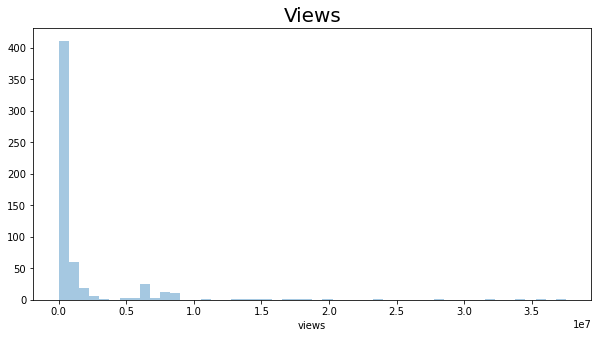

In [15]:
plt.figure(figsize=(10,5))
sns.distplot(df_capstone['views'], kde=False)
plt.title('Views', size=20)

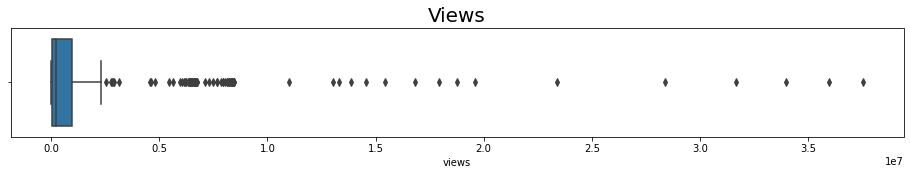

In [16]:
plt.figure(figsize=(16,2))
sns.boxplot(df_capstone['views'])
plt.title('Views', size=20)
plt.show()

In [17]:
q1 = df_capstone['views'].describe()['25%']
q3 = df_capstone['views'].describe()['75%']
iqr = q3 - q1
views_outlier = q3 + (1.5*iqr)
views_outlier

2330256.0

In [18]:
(df_capstone['views'] > views_outlier).count()

569

Text(0.5, 1.0, 'Likes')

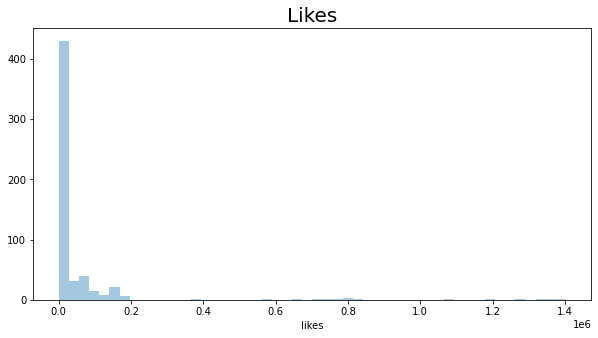

In [19]:
plt.figure(figsize=(10,5))
sns.distplot(df_capstone['likes'], kde=False)
plt.title('Likes', size=20)

Text(0.5, 1.0, 'Likes')

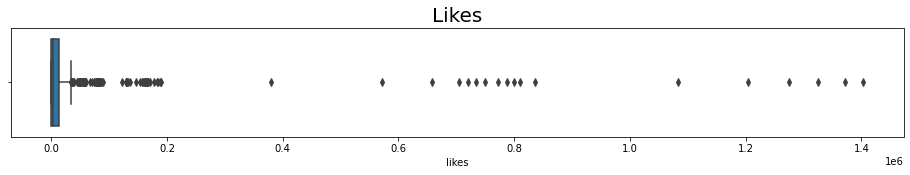

In [20]:
plt.figure(figsize=(16,2))
sns.boxplot(df_capstone['likes'])
plt.title('Likes', size=20)

In [21]:
q1 = df_capstone['likes'].describe()['25%']
q3 = df_capstone['likes'].describe()['75%']
iqr = q3 - q1
likes_outlier = q3 + (1.5*iqr)
likes_outlier

34111.5

In [22]:
(df_capstone['likes'] > likes_outlier).count()

569

Text(0.5, 1.0, 'Dislikes')

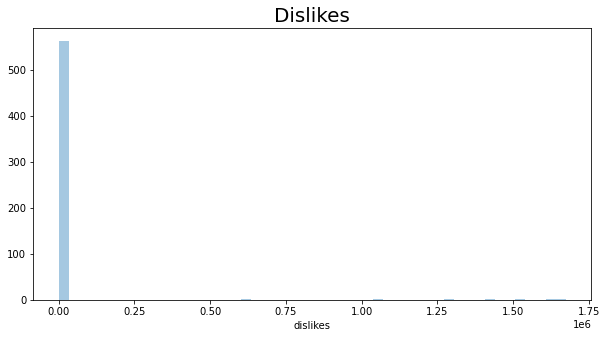

In [23]:
plt.figure(figsize=(10,5))
sns.distplot(df_capstone['dislikes'], kde=False)
plt.title('Dislikes', size=20)

Text(0.5, 1.0, 'Dislikes')

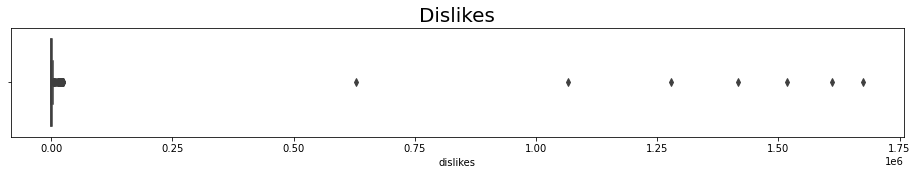

In [24]:
plt.figure(figsize=(16,2))
sns.boxplot(df_capstone['dislikes'])
plt.title('Dislikes', size=20)

In [25]:
q1 = df_capstone['dislikes'].describe()['25%']
q3 = df_capstone['dislikes'].describe()['75%']
iqr = q3 - q1
dislikes_outlier = q3 + (1.5*iqr)
dislikes_outlier

3182.5

In [26]:
(df_capstone['dislikes'] > dislikes_outlier).count()

569

Text(0.5, 1.0, 'Comments')

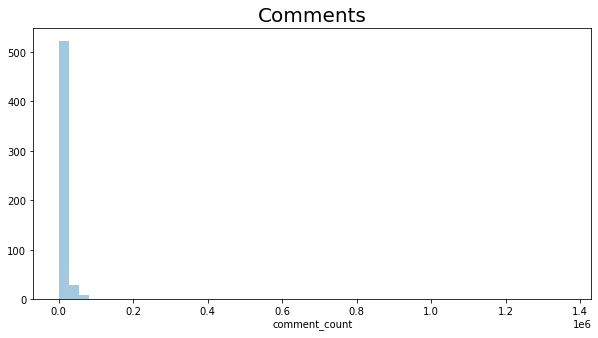

In [27]:
plt.figure(figsize=(10,5))
sns.distplot(df_capstone['comment_count'], kde=False)
plt.title('Comments', size=20)

Text(0.5, 1.0, 'Comments')

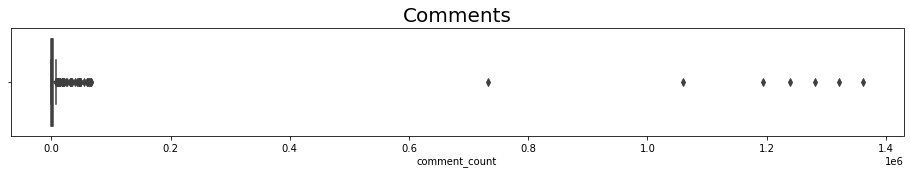

In [28]:
plt.figure(figsize=(16,2))
sns.boxplot(df_capstone['comment_count'])
plt.title('Comments', size=20)

In [29]:
q1 = df_capstone['comment_count'].describe()['25%']
q3 = df_capstone['comment_count'].describe()['75%']
iqr = q3 - q1
comments_outlier = q3 + (1.5*iqr)
comments_outlier

8099.0

In [30]:
(df_capstone['comment_count'] > comments_outlier).count()

569

In [31]:
df_capstone.describe()

,category_id,views,likes,dislikes,comment_count,description
count,569.000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,0.0
mean,21.957821,1.641516e+06,4.942016e+04,1.813890e+04,1.975256e+04,NaN
std,4.977235,4.251066e+06,1.676008e+05,1.495402e+05,1.309990e+05,NaN
min,1.000000,9.450000e+02,1.000000e+00,0.000000e+00,0.000000e+00,NaN
25%,22.000000,4.800100e+04,2.990000e+02,4.500000e+01,4.400000e+01,NaN
50%,24.000000,2.091240e+05,2.201000e+03,3.560000e+02,6.830000e+02,NaN
75%,24.000000,9.609030e+05,1.382400e+04,1.300000e+03,3.266000e+03,NaN
max,29.000000,3.753957e+07,1.402578e+06,1.674420e+06,1.361580e+06,NaN


Dapat dilihat bahwa semua variabel terlihat memiliki outlier cukup besar dan tidak terdistribusi normal. Dengan menggunakan visualisasi masing-masing variabel dengan Boxplot dan Displot, dapat dilihat letak kuartil 1, median, dan kuartil 3 terletak sangat jauh dari data maksimum dari masing-masing variabel. 
- Data jumlah Likes, Dislikes dan komentar terbanyak berada di kisaran 1 juta, sedangkan data jumlah penonton terbanyak berada di kisaran 300 juta.
- Data kuartil ketiga Likes, Dislikes, dan Comments berada di kisaran di bawah 20 ribu, sedangkan data kuartil ketiga Views berada di kisaran 966 ribu.
- Rata-rata jumlah Likes, Dislikes dan Comments berada di kisaran 10-50 ribu, sedangkan rata-rata jumlah penonton adalah di sekitar 1.6 juta.
- Dapat disimpulkan di setiap variabel yang dianalisis terdapat Outlier yang cukup besar dan terdistribusi tidak normal dan miring ke kanan (Right-Skewed).

Dikarenakan keterbatasan Seaborn dan Pyplot dalam menampilkan angka yang cukup besar, apalagi karena ada beberapa video trending YouTube telah mencapai lebih dari 10 juta penonton dan ada yang memiliki lebih dari 1 juta Likes, Dislikes dan komentar, semua angka dalam grafik visualiasi dan fungsi Describe DataFrame dinyatakan dalam bentuk notasi ilmiah (le6 = 10^6 = 1.000.000). Misalnya, ketika melihat angka yang terformat seperti 1.402578e+06, itu berarti notasi 1,402578 * 10^6 = 1.402.578.

In [32]:
df_capstone['comments_disabled'].value_counts()

False    540
True      29
Name: comments_disabled, dtype: int64

In [33]:
df_capstone['ratings_disabled'].value_counts()

False    569
Name: ratings_disabled, dtype: int64

In [34]:
df_capstone['video_error_or_removed'].value_counts()

False    567
True       2
Name: video_error_or_removed, dtype: int64

Kita juga bisa menentukan banyaknya jumlah video Trending YouTube yang mengalami masalah atau memiliki setting privasi (mematikan komentar atau rating video):
- Terdapat 29 video yang tidak mengizinkan penonton memberikan komentar dalam video.
- Tidak ada video yang tidak mengizinkan penonton memberikan Like/Dislike (rating) dalam video.
- Terdapat dua video yang mengalami error atau sudah dihapus dari YouTube.

## Data Analysis and Visualisation

In [35]:
df_capstone = df_capstone.sort_values(by='trending_date')
sns.set_theme(style="darkgrid")

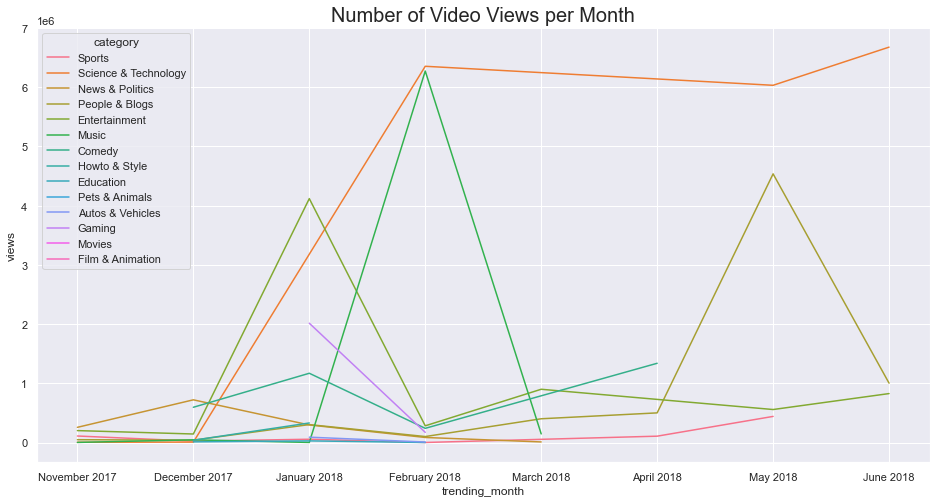

In [36]:
plt.figure(figsize=(16,8))
sns.lineplot(data=df_capstone, x='trending_month', y='views', hue='category', ci=None)
plt.title('Number of Video Views per Month', size=20)
plt.show()

In [37]:
df_capstone = df_capstone.sort_values(by=['views'], ascending=False)

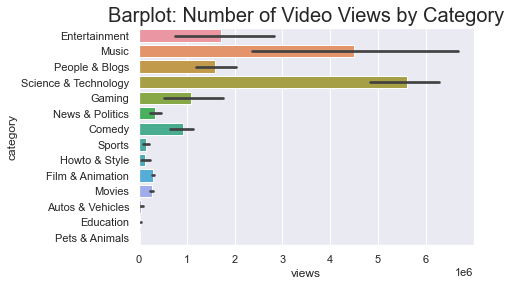

In [38]:
plt.figure()
sns.barplot(data=df_capstone, x='views', y='category')
plt.title('Barplot: Number of Video Views by Category', size=20)
plt.show()

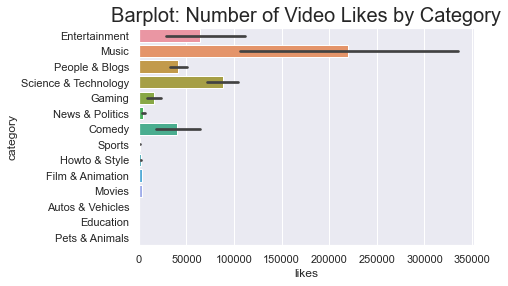

In [39]:
plt.figure()
sns.barplot(data=df_capstone, x='likes', y='category')
plt.title('Barplot: Number of Video Likes by Category', size=20)
plt.show()

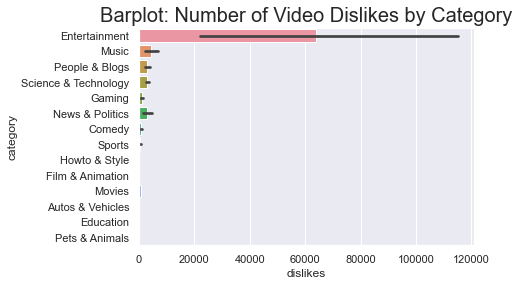

In [40]:
plt.figure()
sns.barplot(data=df_capstone, x='dislikes', y='category')
plt.title('Barplot: Number of Video Dislikes by Category', size=20)
plt.show()

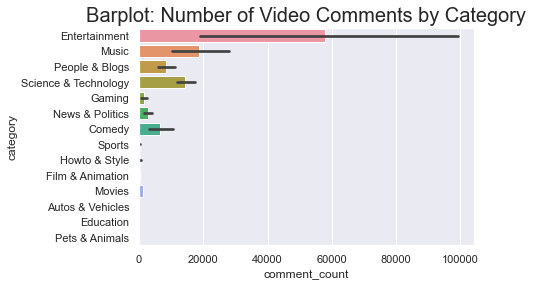

In [41]:
plt.figure()
sns.barplot(data=df_capstone, x='comment_count', y='category')
plt.title('Barplot: Number of Video Comments by Category', size=20)
plt.show()

Dengan visualisasi data menggunakan Barplot, kita dapat mengetahui empat kategori terpopuler di YouTube berdasarkan jumlah Views, Likes, Dislikes, dan Comments, yaitu hiburan, blog dan orang (People and Blogs), sains dan teknologi, dan musik. 

Namun sayangnya, terdapat beberapa kategori lain yang tidak sepopuler empat kategori yang disebutkan dengan jumlah penonton kurang dari data kuartil ketiga, jadi kita harus saring lagi dataset menjadi dataFrame Most Viewed dengan hanya memiliki data video dengan jumlah penonton lebih dari 1 juta.

In [42]:
df_mostviewed = df_capstone[df_capstone['views']> 1000000]
df_mostviewed

,video_id,trending_date,trending_month,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
id,,,,,,,,,,,,,,,,,,,
11323,QwZT7T-TXT0,2018-01-09,January 2018,So Sorry.,Logan Paul Vlogs,24,Entertainment,2018-01-02,16:42:21,"logan paul vlog|""logan paul""|""logan""|""paul""|""olympics""|""logan paul youtube""|""vlog""|""daily""|""comedy""|""hollywood""|""par...",37539570,1402578,1674420,1361580,https://i.ytimg.com/vi/QwZT7T-TXT0/default.jpg,False,False,False,NaN
11096,QwZT7T-TXT0,2018-01-08,January 2018,So Sorry.,Logan Paul Vlogs,24,Entertainment,2018-01-02,16:42:21,"logan paul vlog|""logan paul""|""logan""|""paul""|""olympics""|""logan paul youtube""|""vlog""|""daily""|""comedy""|""hollywood""|""par...",35983135,1370845,1611043,1321281,https://i.ytimg.com/vi/QwZT7T-TXT0/default.jpg,False,False,False,NaN
10862,QwZT7T-TXT0,2018-01-07,January 2018,So Sorry.,Logan Paul Vlogs,24,Entertainment,2018-01-02,16:42:21,"logan paul vlog|""logan paul""|""logan""|""paul""|""olympics""|""logan paul youtube""|""vlog""|""daily""|""comedy""|""hollywood""|""par...",33998325,1325296,1517520,1281094,https://i.ytimg.com/vi/QwZT7T-TXT0/default.jpg,False,False,False,NaN
10638,QwZT7T-TXT0,2018-01-06,January 2018,So Sorry.,Logan Paul Vlogs,24,Entertainment,2018-01-02,16:42:21,"logan paul vlog|""logan paul""|""logan""|""paul""|""olympics""|""logan paul youtube""|""vlog""|""daily""|""comedy""|""hollywood""|""par...",31675237,1275142,1415777,1194249,https://i.ytimg.com/vi/QwZT7T-TXT0/default.jpg,False,False,False,NaN
10415,QwZT7T-TXT0,2018-01-05,January 2018,So Sorry.,Logan Paul Vlogs,24,Entertainment,2018-01-02,16:42:21,"logan paul vlog|""logan paul""|""logan""|""paul""|""olympics""|""logan paul youtube""|""vlog""|""daily""|""comedy""|""hollywood""|""par...",28407744,1204072,1278887,1238817,https://i.ytimg.com/vi/QwZT7T-TXT0/default.jpg,False,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39916,1h7KV2sjUWY,2018-06-09,June 2018,True Facts : Ant Mutualism,zefrank1,22,People & Blogs,2018-05-18,01:00:06,[none],1011768,58597,374,3888,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
8847,Ff7wbSwTuEk,2017-12-28,December 2017,Rocket in the Sky plus Accident.,Mark Sales,23,Comedy,2017-12-23,02:33:48,[none],1008886,8069,567,1821,https://i.ytimg.com/vi/Ff7wbSwTuEk/default.jpg,False,False,False,NaN
39709,1h7KV2sjUWY,2018-06-08,June 2018,True Facts : Ant Mutualism,zefrank1,22,People & Blogs,2018-05-18,01:00:06,[none],1005902,58433,372,3885,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN


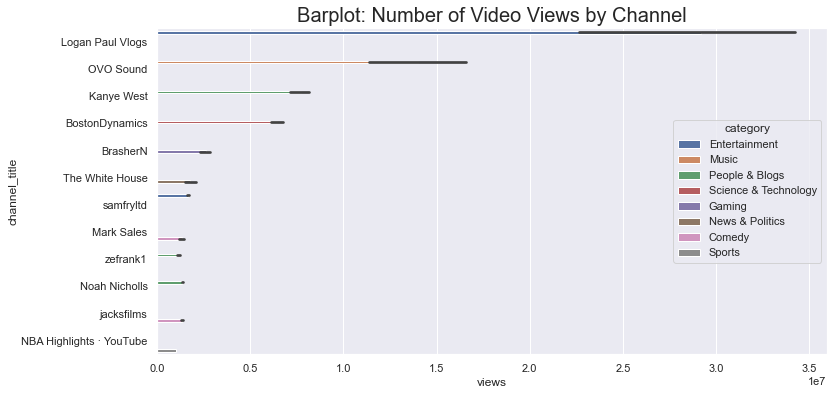

In [43]:
plt.figure(figsize=(12,6))
sns.barplot(data=df_mostviewed, x='views', y='channel_title', hue='category')
plt.title('Barplot: Number of Video Views by Channel', size=20)
plt.show()

In [44]:
video_category = df_mostviewed[['views','category']].groupby(['category'], as_index=False).mean()
video_category

,category,views
0,Comedy,1.325951e+06
1,Entertainment,1.237250e+07
2,Gaming,2.612314e+06
3,Music,1.399310e+07
4,News & Politics,1.780862e+06
5,People & Blogs,4.608503e+06
6,Science & Technology,6.437463e+06
7,Sports,1.015189e+06


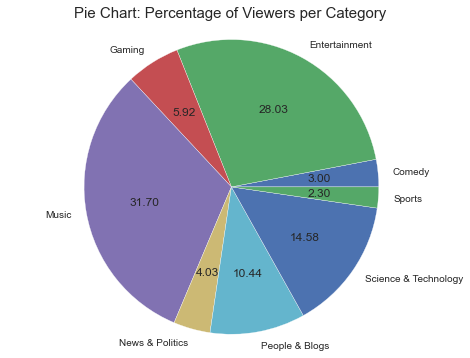

In [45]:
plt.style.use('seaborn')
plt.figure(figsize=(8, 6))
plt.pie(video_category['views'], 
        labels=video_category['category'],
        autopct = '%.2f')
plt.axis('equal')
plt.title('Pie Chart: Percentage of Viewers per Category', size=15)
plt.show()

Dari dataset yang kita saring menjadi data dengan jumlah penonton video terbanyak di YouTube, kita bisa menentukan 5 kanal YouTube dengan penonton terbanyak yaitu:
- Logan Paul (Hiburan)
- OVO Sound (Musik). Video klip untuk lagu Drake - God's Plan membuatnya masuk ke daftar Trending
- Kanye West (Blog dan Orang)
- BostonDynamics (Sains dan Teknologi)
- zefrank1 (Blog dan Orang). Video yang membahas tentang mutualisme semut dan tanaman karnivora

In [46]:
video_category = df_mostviewed[['views','category']].groupby(['category'], as_index=False).sum()
video_category

,category,views
0,Comedy,18563315
1,Entertainment,222705087
2,Gaming,13061570
3,Music,153924091
4,News & Politics,14246893
5,People & Blogs,202774139
6,Science & Technology,218873743
7,Sports,1015189


In [47]:
correlation_matrix = df_capstone[['views', 'likes', 'dislikes', 'comment_count']].corr()
correlation_matrix

,views,likes,dislikes,comment_count
views,1.000000,0.944235,0.766932,0.802372
likes,0.944235,1.000000,0.792876,0.831791
dislikes,0.766932,0.792876,1.000000,0.993106
comment_count,0.802372,0.831791,0.993106,1.000000


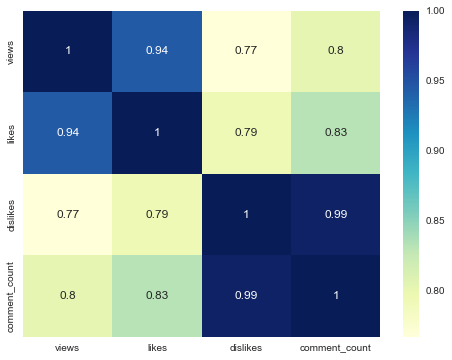

In [48]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu')
plt.show()

## Hypothesis Testing

Setelah melakukan analisis data untuk menentukan Outlier, Duplicate dan Missing Values (kita akan menganalisis data dengan Missing Values), kita akan melakukan Uji Statistik sebagai berikut:

### Hubungan dari keempat variabel numerik yang akan dianalisis.

- Ho (Null Hypothesis): Rata-rata dari masing-masing dari keempat variabel (Views, Likes, Describes, Comments) adalah sama
- Ha (Alternative Hypothesis): Minimal salah satu dari variabel ada yang berbeda

In [49]:
stat, pval = f_oneway(
    df_capstone['views'], df_capstone['likes'], df_capstone['dislikes'],  df_capstone['comment_count']
)

print('Statistic:', stat)
print('P-Value:', pval)

# Conclusion
if pval/2 < 0.05:
    print('Tolak H0')
else:
    print('Terima H0')

Statistic: 81.5802421113074
P-Value: 4.0117447705483983e-50
Tolak H0


In [50]:
ratarata_views = df_capstone['views'].mean()
ratarata_likes = df_capstone['likes'].mean()
ratarata_dislikes = df_capstone['dislikes'].mean()
ratarata_comments = df_capstone['comment_count'].mean()

print("""
Rata-rata jumlah Views: {}
Rata-rata jumlah Likes: {}
Rata-rata jumlah Dislikes: {}
Rata-rata jumlah Comments: {}"""
      .format(ratarata_views, ratarata_likes, ratarata_dislikes, ratarata_comments))


Rata-rata jumlah Views: 1641516.0175746924
Rata-rata jumlah Likes: 49420.15817223198
Rata-rata jumlah Dislikes: 18138.896309314587
Rata-rata jumlah Comments: 19752.558875219685


### Pengaruh Likes, dan Comments Terhadap Jumlah Penonton Video

- Ho (Null Hypothesis): Jumlah Likes dan Komentar mempengaruhi Jumlah Views
- Ha (Alternative Hypothesis): Tidak ada pengaruh jumlah Views dari jumlah Likes, dan Komentar

In [51]:
stat, pval = ttest_ind(
    df_capstone[df_capstone['views']>5000000]['likes'],
    df_capstone[df_capstone['views']>5000000]['comment_count'],
    equal_var = True
)

print('Statistic:', stat)
print('P-Value:', pval)

# Conclusion
if pval/2 < 0.05:
    print('Tolak H0')
else:
    print('Terima H0')

Statistic: 2.843400183727191
P-Value: 0.005142384811735398
Tolak H0


In [52]:
categori = df_capstone['category']
jumlah_views = df_capstone[df_capstone['views']>5000000]['views']
jumlah_likes = df_capstone[df_capstone['views']>5000000]['likes']
jumlah_comments = df_capstone[df_capstone['views']>5000000]['comment_count']

df_tes = pd.DataFrame(data=list(zip(categori, jumlah_views, jumlah_likes, jumlah_comments)),columns='Category Views Likes Comments'.split())
df_tes

,Category,Views,Likes,Comments
0,Entertainment,37539570,1402578,1361580
1,Entertainment,35983135,1370845,1321281
2,Entertainment,33998325,1325296,1281094
3,Entertainment,31675237,1275142,1194249
4,Entertainment,28407744,1204072,1238817
...,...,...,...,...
65,Science & Technology,6131730,80722,12790
66,Science & Technology,6046988,79824,12646
67,Science & Technology,5936113,78765,12477
68,Science & Technology,5650991,76461,12187


### Dampak Popularitas Video Berdasarkan Kategori

- Ho (Null Hypothesis): Video dengan jumlah penonton terbanyak berasal dari empat kategori teratas di YouTube
- Ha (Alternative Hypothesis): Tidak ada pengaruh video yang memiliki jumlah penonton terbanyak dari kategori teratas di YouTube

In [53]:
stat, pval = f_oneway(
    df_capstone[df_capstone['category'] == 'Entertainment' ]['views'][df_capstone['views'] > 5000000],
    df_capstone[df_capstone['category'] == 'People & Blogs' ]['views'][df_capstone['views'] > 5000000],
    df_capstone[df_capstone['category'] == 'Science & Technology' ]['views'][df_capstone['views'] > 5000000],
    df_capstone[df_capstone['category'] == 'Music' ]['views'][df_capstone['views'] > 5000000],
)

print('Statistic:', stat)
print('P-Value:', pval)

# Conclusion
if pval/2 < 0.05:
    print('Tolak H0')
else:
    print('Terima H0')

Statistic: 125.73795820828961
P-Value: 3.0860839000263835e-27
Tolak H0


### Kesimpulan

- Tidak semua video Trending YouTube tanpa deskripsi benar-benar layak masuk ke dalam daftar Trending.
- Pengukuran Tendisi Sentral dan Simpangan (Mean, Median, Kuartil, dan Simpangan Baku) untuk data yang dianalisis berada di kisaran angka kurang dari 100 ribu. Padahal jumlah penonton terbanyak adalah sekitar 30 juta, sedangkan jumlah Likes, Dislikes, dan komentar terbanyak adalah sekitar 1 juta.
- Empat kategori video Trending YouTube terpopuler tanpa deskripsi adalah:
    - Hiburan
    - Sains dan Teknologi
    - Blog dan Orang
    - Musik.
- Lima kanal/Content Creator YouTube yang mengunggah video tanpa deskripsi dengan jumlah penonton terbanyak adalah:
    - Logan Paul
    - Kanye West
    - Drake (OVO Sound)
    - Boston Dynamics
    - Zefrank1

### Rekomendasi

- Gunakan dataset untuk video yang sedang Trending saat ini, apalagi di masa pengerjaan Capstone Project pada bulan Maret-April 2023.
- Mencoba melakukan analisis untuk seluruh dataset, jangan memaksakan komputer kita untuk melakukan analisis dataset yang begitu besar dengan jumlah entry lebih dari sekitar 40 ribu, karena akan memakan memori dan membuat performa komputer sangat lambat.
- Menggunakan dataset video Trending YouTube yang jika dianalisis bisa menghasilkan banyak data video Trending dengan angka Likes, Dislikes, komentar, dan penonton yang sangat besar, dikarenakan Daftar Video Trending adalah daftar video yang bisa menghasilkan angka sebesar yang diharapkan oleh banyak orang dan dipengaruhi oleh fenomena atau peristiwa yang sedang terjadi pada saat itu.